In [23]:
import pandas as pd
import warnings
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

df = pd.read_csv('clustering_model.csv')
warnings.filterwarnings(action='ignore')

df.head(10)

,Player,Position,League,Age,90s,Players_tackled,Tackles_won,Tackles_def3rd,Tackles_mid3rd,Tackles_att3rd,...,Dribbers_tackled%,Challenges_lost,Number_of_blocks,Shots_blocked,Passes_blocked,Interceptions,Number_of_Players_tackles_and_Int,Clearances,Errors_leading_to_shot,Minutes
0,Montassar Talbi,0,3,24,38.0,53,25,40,13,0,...,62.9,13,55,34,21,40,93,190,3,3420.0
1,James Tarkowski,0,1,29,38.0,51,26,36,13,2,...,52.6,18,99,78,21,51,102,201,3,3420.0
2,Gabriel Dos Santos,0,1,24,37.9,48,30,29,15,4,...,66.7,9,49,26,23,32,80,125,2,3411.0
3,Fran Garcia,0,2,22,37.9,84,54,53,23,8,...,57.3,41,49,8,41,44,128,66,0,3411.0
4,Birama Touré,6,3,30,37.8,80,47,35,35,10,...,36.6,59,54,9,45,67,147,49,0,3402.0
5,Harry Kane,3,1,29,37.8,15,12,1,6,8,...,33.3,14,27,7,20,2,17,18,0,3402.0
6,Alex Iwobi,8,1,26,37.5,69,37,37,28,4,...,50.8,32,41,2,39,25,94,29,0,3375.0
7,James Ward-Prowse,6,1,27,37.5,65,37,31,27,7,...,34.4,40,30,10,20,55,120,48,0,3375.0
8,Kieran Trippier,0,1,31,37.1,71,49,36,27,8,...,51.1,44,45,15,30,43,114,84,2,3339.0
9,Yunis Abdelhamid,0,3,34,37.0,82,50,47,33,2,...,75.0,13,65,27,38,64,146,116,1,3330.0


In [24]:
df['Tackles_att3rd_per90'] =   (df['Tackles_att3rd'] / df['Minutes']) * 90
df['Tackles_mid3rd_per90'] =   (df['Tackles_mid3rd'] / df['Minutes']) * 90

In [25]:
df = df[['Player','Position','Tackles_mid3rd_per90','Tackles_att3rd_per90']]

df = df[(df['Tackles_att3rd_per90'] > 0) & (df['Tackles_mid3rd_per90'] > 0)]

In [26]:
df.shape

(1106, 4)

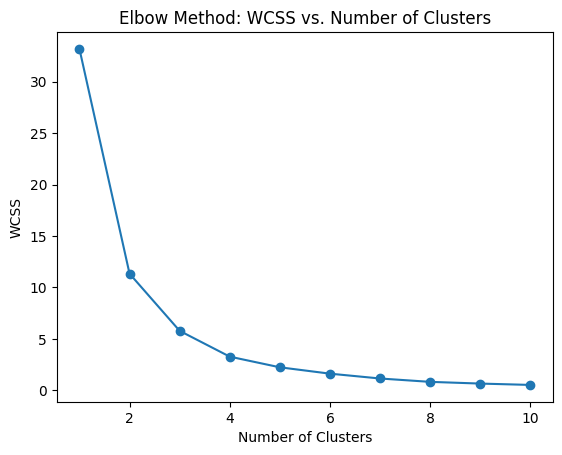

In [76]:
from sklearn.preprocessing import StandardScaler

metrics = ['Tackles_att3rd_per90']

# Select the columns for clustering
X = df[metrics]

# Standardize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
wcss = []
max_clusters = 10  # Maximum number of clusters to evaluate

for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method: WCSS vs. Number of Clusters')
plt.show()

In [62]:
metrics = ['Tackles_att3rd_per90']

# Select the columns for clustering
X = df[metrics]


# Create and fit the K-means model
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as desired

# Standardize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans.fit(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

#Store the cluster centers in a dataframe
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['cluster'])

# Calculate the inertia
inertia = kmeans.inertia_

# Print the inertia
print("Inertia:", inertia)


# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

y_kmeans = kmeans.fit_predict(X_scaled)

Inertia: 5.7816692891161345
Silhouette Score: 0.5655951905852035


# values with min max scaler

Inertia: 5.784194702005106
Silhouette Score: 0.5662872333853032

In [54]:
init_list = ["k-means++", "random"]
inertia_list = []
for init in init_list:
    kmeans_model = KMeans(n_clusters=3, init=init)
    kmeans_model.fit(X_scaled)
    inertia_list.append(kmeans_model.inertia_)

results = pd.DataFrame(data=inertia_list, columns=["Inertia Value"], index=init_list)
results

,Inertia Value
k-means++,5.782382
random,5.781669


In [64]:
cluster_centers

,cluster
0,0.095984
1,0.543013
2,0.290592


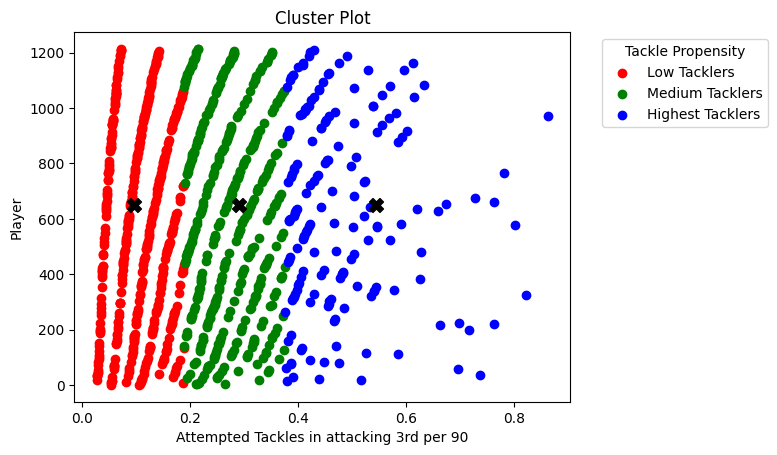

In [75]:
# Assign different colors to each cluster
colors = ["red", "blue", "green"]

# Create a scatter plot for each data point
for cluster in df["Cluster"].unique():
    cluster_data = df[df["Cluster"] == cluster]
    plt.scatter(cluster_data["Tackles_att3rd_per90"], cluster_data.index, color=colors[cluster], label=f"Cluster {cluster}")

# Manually plot the cluster centers
cluster_centers = [0.095984, 0.543013, 0.290592]
y_positions = [650, 650, 650]  # Adjust the y-coordinate values to move the markers higher up
x_positions = [110, 220, 444]
for cluster, center in enumerate(cluster_centers):
    plt.scatter(center,y_positions[cluster], color="black", marker="X", s=100)


# Set labels and title
plt.xlabel("Attempted Tackles in attacking 3rd per 90")
plt.ylabel("Player")
plt.title("Cluster Plot")


# Rename legend labels
legend_labels = {
    1: "Highest Tacklers",
    2: "Medium Tacklers",
    0: "Low Tacklers"
}

# Display the legend with renamed labels
plt.legend(title="Tackle Propensity", labels=[legend_labels[label] for label in df["Cluster"].unique()],bbox_to_anchor=(1.05, 1))

# Show the plot
plt.show()

In [59]:
df

,Player,Position,Tackles_mid3rd_per90,Tackles_att3rd_per90,Cluster
1,James Tarkowski,0,0.342105,0.052632,0
2,Gabriel Dos Santos,0,0.395778,0.105541,0
3,Fran Garcia,0,0.606860,0.211082,2
4,Birama Touré,6,0.925926,0.264550,2
5,Harry Kane,3,0.158730,0.211640,2
...,...,...,...,...,...
1209,Jaidon Anthony,8,0.642857,0.428571,1
1210,Mathias Pereira Lage,8,1.000000,0.071429,0
1211,Gabriel Suazo,0,1.071429,0.214286,2
1212,El Bilal Touré,3,0.071429,0.071429,0


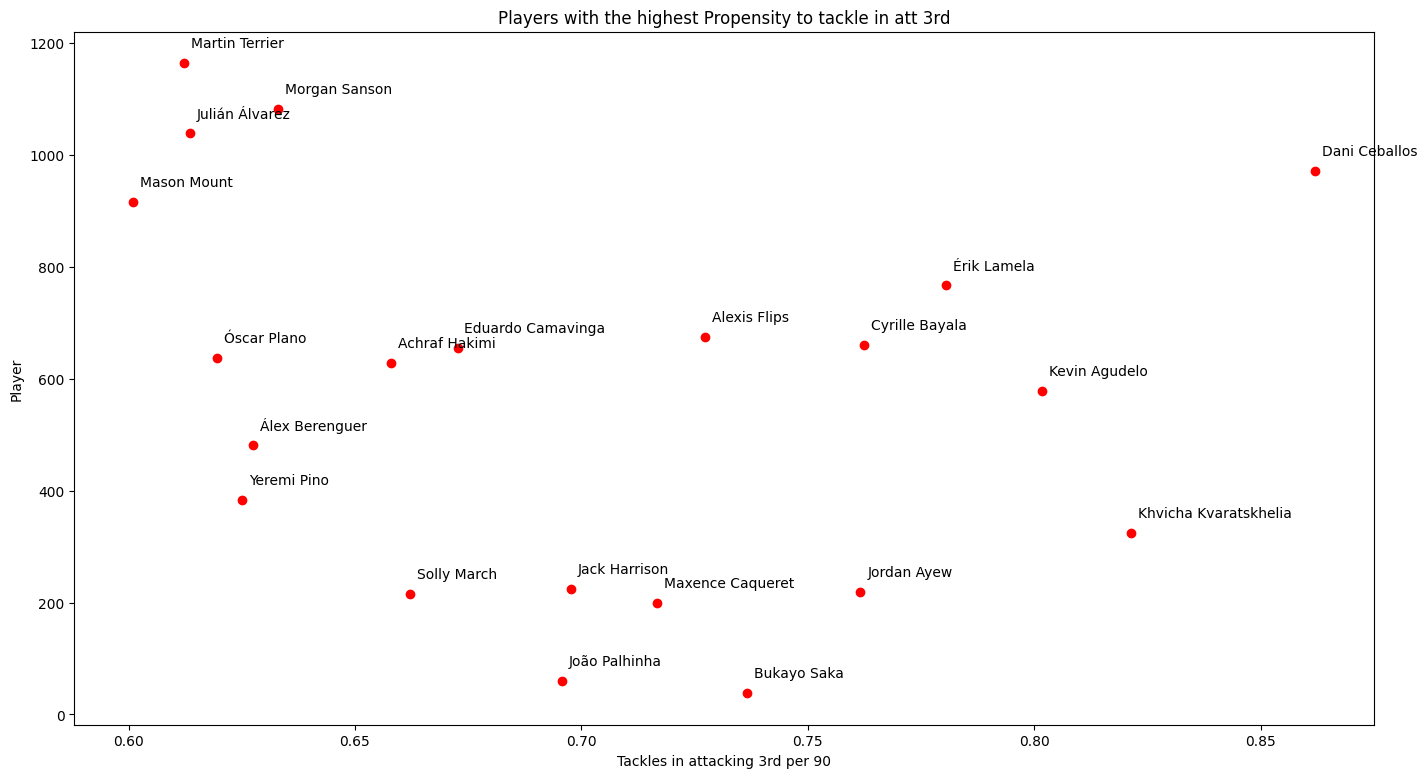

In [77]:
# Filter data for Cluster 0 with Tackles_att3rd_per90 > 0.60
filtered_data = df[(df["Cluster"] == 1) & (df["Tackles_att3rd_per90"] > 0.60)]

plt.figure(figsize=(20, 9))

# Create scatter plot with filtered player names as labels
plt.scatter(filtered_data["Tackles_att3rd_per90"], filtered_data.index, color="red")

for i, player in enumerate(filtered_data["Player"]):
    x_value = filtered_data.loc[filtered_data["Player"] == player, "Tackles_att3rd_per90"].values[0]
    plt.annotate(player, (x_value, filtered_data.index[i]), xytext=(5, 14), textcoords='offset points', ha='left', va='center')

# Set labels and title
plt.xlabel("Tackles in attacking 3rd per 90")
plt.ylabel("Player")
plt.title("Players with the highest Propensity to tackle in att 3rd")

# Adjust spacing for player names
plt.subplots_adjust(left=0.25)

# Show the plot
plt.show()



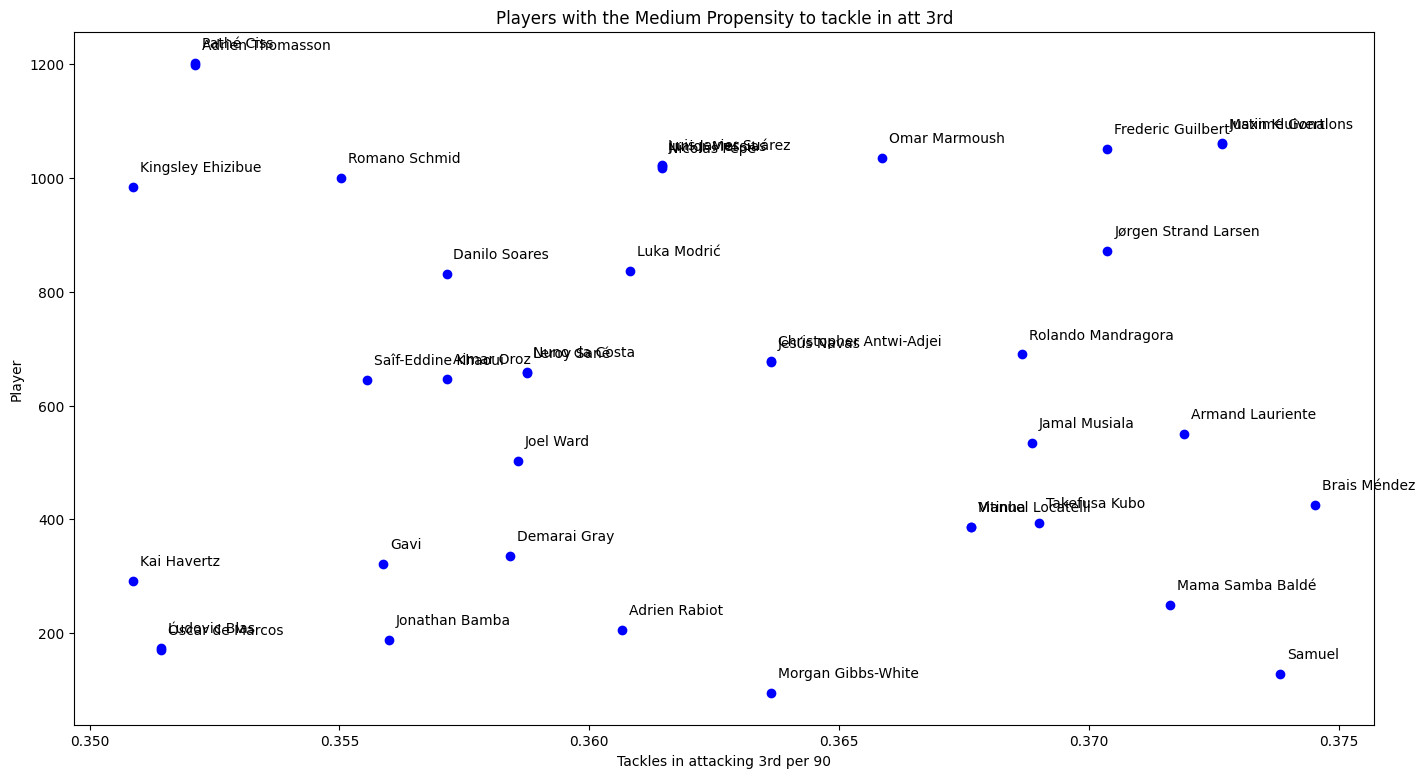

In [113]:
# Filter data for Cluster 0 with Tackles_att3rd_per90 > 0.60
filtered_data = df[(df["Cluster"] == 2) & (df["Tackles_att3rd_per90"] > 0.35)]

plt.figure(figsize=(20, 9))

# Create scatter plot with filtered player names as labels
plt.scatter(filtered_data["Tackles_att3rd_per90"], filtered_data.index, color="blue")

for i, player in enumerate(filtered_data["Player"]):
    x_value = filtered_data.loc[filtered_data["Player"] == player, "Tackles_att3rd_per90"].values[0]
    plt.annotate(player, (x_value, filtered_data.index[i]), xytext=(5, 14), textcoords='offset points', ha='left', va='center')

# Set labels and title
plt.xlabel("Tackles in attacking 3rd per 90")
plt.ylabel("Player")
plt.title("Players with the Medium Propensity to tackle in att 3rd")

# Adjust spacing for player names
plt.subplots_adjust(left=0.25)

# Show the plot
plt.show()